In [4]:
%matplotlib inline
from __future__ import division
import serial
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pylab
import pandas as pd
import xlsxwriter
import math
import collections

pylab.rcParams['figure.figsize'] = (10.0, 10.0)

/Users/legion/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
LEDDAR_FREQ = 50

In [6]:
def rolling_mean(array, points):
    cumsums = np.cumsum(np.insert(array, 0, 0))
    return (cumsums[points:] - cumsums[:-points]) / points

In [31]:
distances = list()
commands = list()
accels = list()
with open("/Users/legion/Dropbox/Chomp/motor controller stuff/chump_drive_test2.txt") as fh:
    for line in fh:
        fields = line.rstrip().split("\t")
        distance, command, accel, delta_t = int(fields[0]), int(fields[1]), float(fields[2]), int(fields[3])
        distances.append(distance)
        commands.append(command)
        accels.append(accel)

distances = np.array(distances)
commands = np.array(commands)

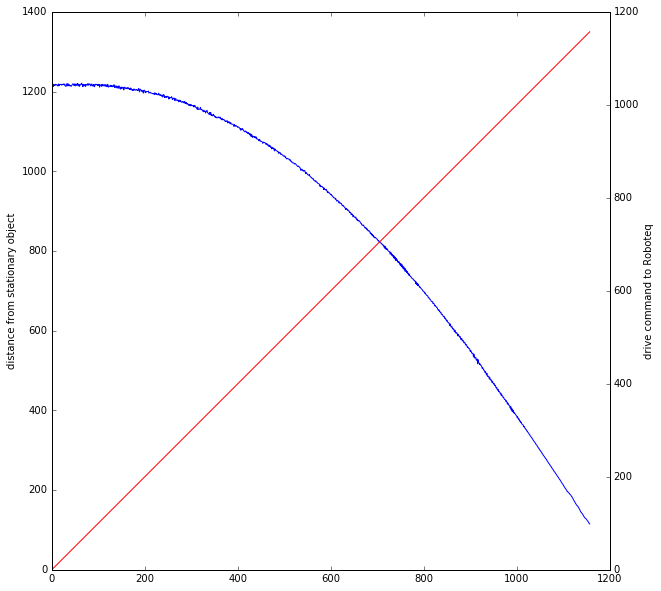

In [10]:
plt.plot(distances)
plt.ylabel("distance from stationary object")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(commands, color="red")
plt.ylabel("drive command to Roboteq")

In [20]:
def polyfit_derivative(data, num_points):
    poly_derivatives = list()
    for i in range(len(data) - num_points):
        x = sum(range(num_points)) / num_points
        polyfit = np.polyfit(range(num_points), data[i:i + num_points], 2)
        first_derivative = 2 * polyfit[0] * x + polyfit[1]
        poly_derivatives.append(first_derivative * LEDDAR_FREQ)
#         print first_derivative
    return np.array(poly_derivatives)

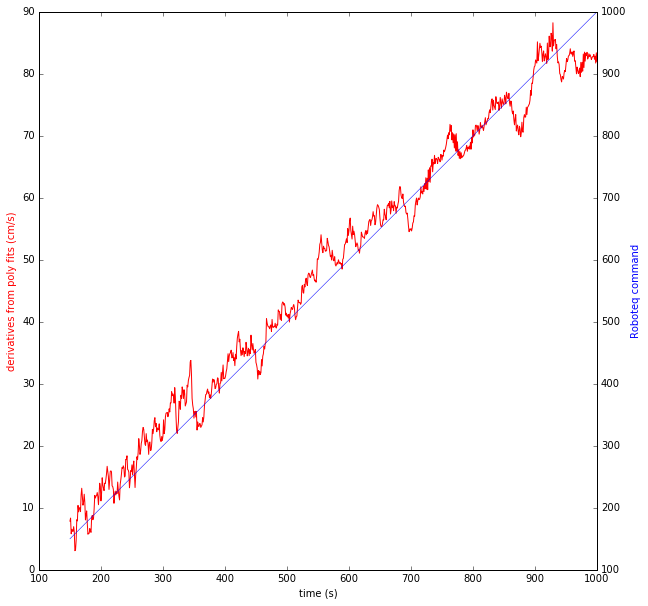

In [95]:
poly_derivatives = -1 * polyfit_derivative(distances, 25)
plt.plot(np.arange(150, 1001), poly_derivatives[150-12:1000-11], color="red")
plt.xlabel("time (s)")
plt.ylabel("derivatives from poly fits (cm/s)", color="red")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(commands[150:1000], commands[150:1000], linewidth=0.5)
plt.ylabel("Roboteq command", color="blue")
ymin1, ymax1 = ax1.get_ylim()
ymin2, ymax2 = ax2.get_ylim()
ymin = min(ymin1, ymin2)
ymax = max(10, ymax1, ymax2)
# ax1.set_ylim(0, ymax1)
# ax2.set_ylim(ymin, ymax)

In [38]:
np.polyfit(-1 * commands[12:1000], poly_derivatives[:1000-12], 1)

array([ 0.09345191,  5.21187077])

[ 0.08578077]


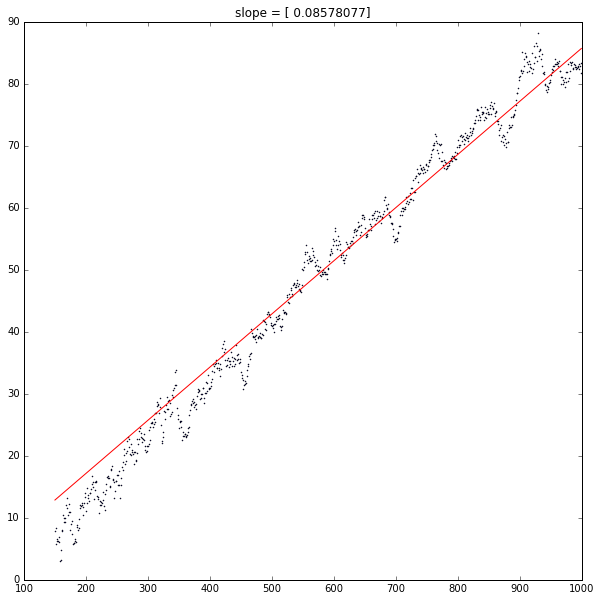

In [99]:
x = commands[150:1000, np.newaxis]
y = poly_derivatives[150-12:1000-12]
a, _, _, _ = np.linalg.lstsq(x, y)
plt.plot(x, y, 'bo', markersize=1)
plt.plot(x, a*x, 'r-')
plt.title("slope = {}".format(a))
print a
plt.show()

In [68]:
drive_commands = list()
ang_vels = list()
with open("/Users/legion/Dropbox/Chomp/chump_spin_gyro_data.txt") as fh:
    for line in fh:
        line = line.rstrip().split("\t")
        drive_commands.append(int(line[0]))
        ang_vels.append(float(line[1]))
drive_commands = np.array(drive_commands)
ang_vels = np.array(ang_vels)
ang_vels_rad = np.deg2rad(ang_vels)

In [67]:
np.array_equal(np.radians(ang_vels), np.deg2rad(ang_vels))

True

(-0.5, 3.0)

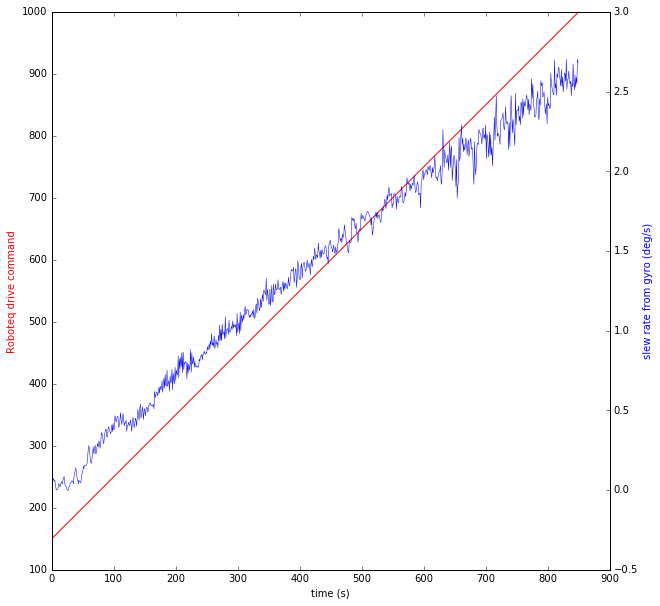

In [73]:
plt.plot(drive_commands[150:1000], color="red")
plt.xlabel("time (s)")
plt.ylabel("Roboteq drive command", color="red")
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(ang_vels_rad[150:1000], linewidth=0.5)
plt.ylabel("slew rate from gyro (deg/s)", color="blue")
ymin1, ymax1 = ax1.get_ylim()
ymin2, ymax2 = ax2.get_ylim()
ymin = min(ymin1, ymin2)
ymax = max(10, ymax1, ymax2)
ax1.set_ylim(ymin1, ymax1)
ax2.set_ylim(ymin2, ymax2)

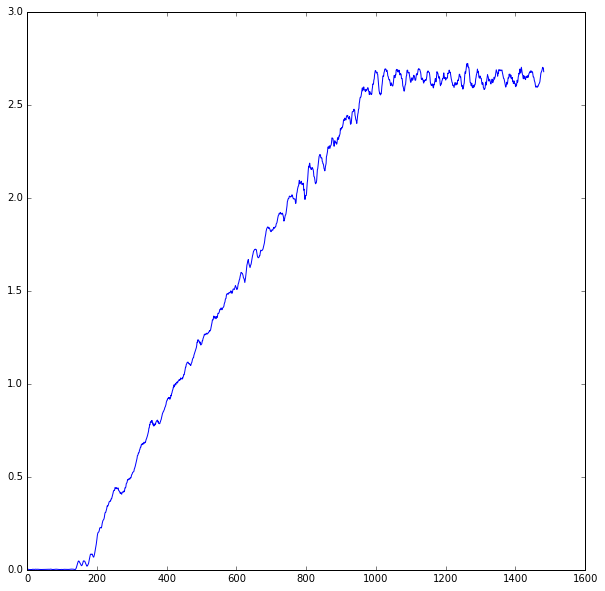

In [70]:
plt.plot(rolling_mean(ang_vels_rad, 10))

In [63]:
np.polyfit(ang_vels[150:1000], drive_commands[150:1000], 1)

array([   5.62236869,  126.84261222])

In [71]:
np.polyfit(ang_vels_rad[150:1000], drive_commands[150:1000], 1)

array([ 322.13799692,  126.84261222])

In [88]:
commands[150:1000]

array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
       293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 33